# Polynomial Regression

To describe the connection between x(independent value) and y(dependent value) as an nth degree polynomial constitutes Polynomial Regression, a specific kind of linear regression. Polynomial regression is used to approximate a nonlinear connection between the value of x and the conditional mean of y.

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data= pd.DataFrame({'diameter':[6,8,10,14,18],'price':[7,9,13,17.5,18]})
train_data

,diameter,price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


In [4]:
x_train=train_data['diameter'].values
x_train

array([ 6,  8, 10, 14, 18], dtype=int64)

In [5]:
x_train=x_train.reshape(5,1)
x_train

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [6]:
y_train=train_data['price'].values
y_train

array([ 7. ,  9. , 13. , 17.5, 18. ])

In [7]:
y_train=y_train.reshape(5,1)
y_train

array([[ 7. ],
       [ 9. ],
       [13. ],
       [17.5],
       [18. ]])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()

In [10]:
model.fit(x_train,y_train)

LinearRegression()

In [11]:
test_data= pd.DataFrame({'diameter':[6,8,11,16],'price':[8,12,15,18]})
test_data

,diameter,price
0,6,8
1,8,12
2,11,15
3,16,18


In [12]:
x_test=test_data['diameter'].values.reshape(4,1)
x_test

array([[ 6],
       [ 8],
       [11],
       [16]], dtype=int64)

In [13]:
y_test=test_data['price'].values.reshape(4,1)
y_test

array([[ 8],
       [12],
       [15],
       [18]], dtype=int64)

# Linear Graph Supposition & Plotting With Trained Data   

In [14]:
x_suppose=np.linspace(0,26,100) #in one dimension
x_suppose

array([ 0.        ,  0.26262626,  0.52525253,  0.78787879,  1.05050505,
        1.31313131,  1.57575758,  1.83838384,  2.1010101 ,  2.36363636,
        2.62626263,  2.88888889,  3.15151515,  3.41414141,  3.67676768,
        3.93939394,  4.2020202 ,  4.46464646,  4.72727273,  4.98989899,
        5.25252525,  5.51515152,  5.77777778,  6.04040404,  6.3030303 ,
        6.56565657,  6.82828283,  7.09090909,  7.35353535,  7.61616162,
        7.87878788,  8.14141414,  8.4040404 ,  8.66666667,  8.92929293,
        9.19191919,  9.45454545,  9.71717172,  9.97979798, 10.24242424,
       10.50505051, 10.76767677, 11.03030303, 11.29292929, 11.55555556,
       11.81818182, 12.08080808, 12.34343434, 12.60606061, 12.86868687,
       13.13131313, 13.39393939, 13.65656566, 13.91919192, 14.18181818,
       14.44444444, 14.70707071, 14.96969697, 15.23232323, 15.49494949,
       15.75757576, 16.02020202, 16.28282828, 16.54545455, 16.80808081,
       17.07070707, 17.33333333, 17.5959596 , 17.85858586, 18.12

In [15]:
x_suppose=x_suppose.reshape(100,1)  #changing into multi dimension

In [16]:
y_suppose=model.predict(x_suppose)  #Predict the supposition variable with trained model

In [17]:
import matplotlib.pyplot as plt 

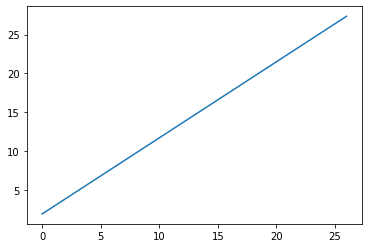

In [18]:
plt.plot(x_suppose,y_suppose)

# Combining Supposed Linear Data With Polynomial  or Quadratic Test Data

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
Quadratic_Feature=PolynomialFeatures(degree=2) #Degree shows the type of non-linear equation (e.g: x-square,x-cube......)

In [21]:
x_train_quadratic=Quadratic_Feature.fit_transform(x_train)


In [22]:
x_test_quadratic=Quadratic_Feature.fit_transform(x_test)

In [23]:
Quadratic_model=LinearRegression()

In [24]:
Quadratic_model.fit(x_train_quadratic,y_train)

LinearRegression()

In [25]:
Suppose_quadratic=Quadratic_Feature.transform(x_suppose)

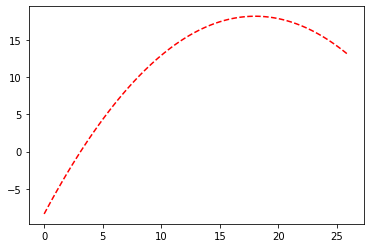

In [26]:
plt.plot(x_suppose, Quadratic_model.predict(Suppose_quadratic), c='r',linestyle='--')

# Combining Quadratic and Linear Data Together

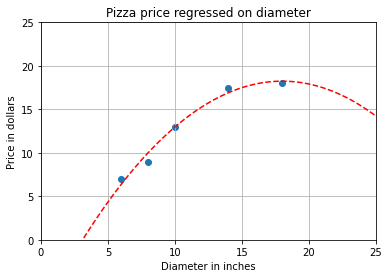

In [27]:
plt.plot(x_suppose, Quadratic_model.predict(Suppose_quadratic), c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(x_train, y_train)
plt.show()

In [28]:
print(x_train)

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


In [29]:
print(x_train_quadratic)


[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


# Linear R-Score

In [30]:
print('Simple linear regression r-squared', model.score(x_test, y_test))


Simple linear regression r-squared 0.809726797707665


# Polynomial R-Score

In [31]:
print('Quadratic regression r-squared', Quadratic_model.score(x_test_quadratic, y_test))

Quadratic regression r-squared 0.8675443656345073
